### EDA of iris dataset

__cell markdowns are described ABOVE the cell__

__import and read csv__

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
iris = pd.read_csv('iris.csv')

In [59]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

__drop unnecessary column__

In [60]:
iris.drop(columns='Id',inplace=True)

__changing column names for simplicity__

In [61]:
columns=['sl','sw','pl','pw','output']

In [62]:
iris.columns= columns

In [63]:
iris.dtypes

sl        float64
sw        float64
pl        float64
pw        float64
output     object
dtype: object

__check for output bias-ness, here data is 100% unbiased__

In [64]:
iris.output.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: output, dtype: int64

__making seperate dfs of each output class__

In [65]:
iris_setosa = iris.loc[iris["output"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["output"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["output"] == "Iris-versicolor"];

__1D scatter plot (difficult to read and understand)__
<br>
insight: Virginica and Versicolor are overlapping

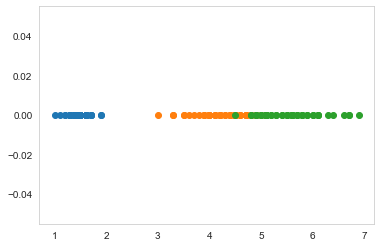

In [66]:
plt.plot(iris_setosa["pl"],np.zeros_like(iris_setosa["pl"]), 'o')
plt.plot(iris_versicolor["pl"],np.zeros_like(iris_versicolor["pl"]), 'o')
plt.plot(iris_virginica["pl"],np.zeros_like(iris_virginica["pl"]), 'o')
plt.grid()
plt.show()

__Below 2D scatter is meaningless, as it is just plotting all the values.__

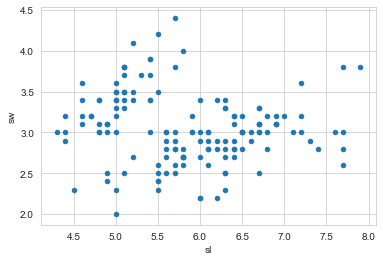

In [67]:
iris.plot(kind="scatter",x="sl",y="sw")
plt.show()

So now let's see which values are representing which output (species classes), as below:
<br>
__INSIGHT__ :Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others
<br>
Separating Versicolor from Viginica is much harder as they have considerable overlap

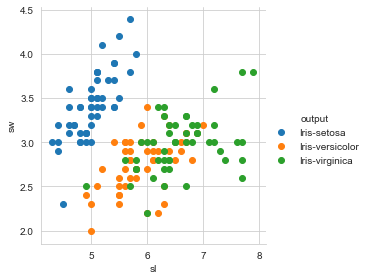

In [68]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="output",height=4).map(plt.scatter,"sl","sw").add_legend()
plt.show()

__Trying 3D scatters__

In [89]:
fig = px.scatter_3d(iris, x='sl', y='sw', z='pw',color='output')
fig.show()

__Drag your mouse over the plot, scroll in scroll out, MAGIC...!!!__
<br>
__As seen here, only 3 features can be plottes in 3D, what if we had to visualize all features?__
<br>
__Here comes the concept of pairplots__

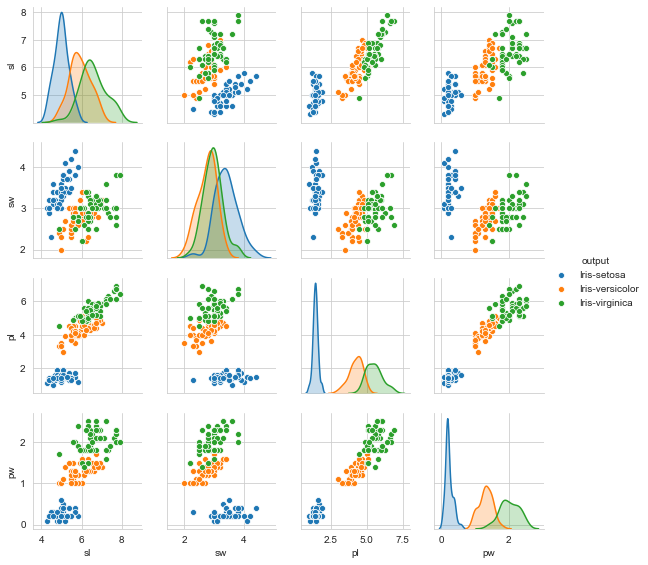

In [70]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="output",height=2);
plt.show()

__Applying all possible combinatios to make pairs__
<br>
sepal_length , sepal_width
<br>
sepal_length , petal_length
<br>
etc...
<br>
__diagonal plots = Histograms (to check distribution/density)__
<br>
__upper traingular = scatter plot of the features__
<br>
__lower traingular = mirror image__

-petal length and petal width are the most useful features to identify various flower types.
<br>
-While Setosa can be easily identified (linearly separable),
<br>
virginica and Versicolor have some overlap (almost linearly separable).

__LIMITATION :__
<br>
If you have n features, you will have a pair plot of size nxn cells

__Now let's apply Hists and PDF as below (on each feature one by one)__
<br>
*insight to find* : which output class is heavily dependent on which values of features 

__applying on petal_length__

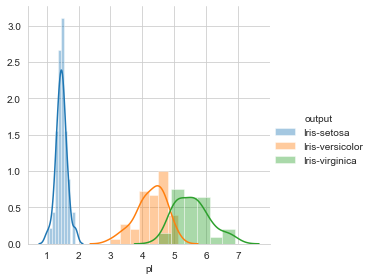

In [71]:
sns.FacetGrid(iris,hue="output",height=4).map(sns.distplot,"pl").add_legend();
plt.show();

__applying on petal_width__

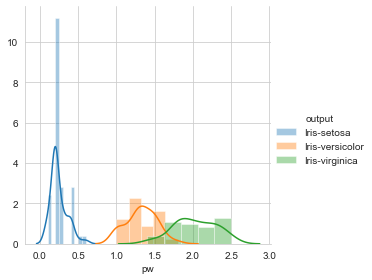

In [72]:
sns.FacetGrid(iris,hue="output",height=4).map(sns.distplot,"pw").add_legend();
plt.show();

__applying on sepal_length__

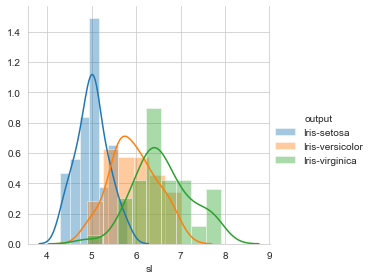

In [73]:
sns.FacetGrid(iris,hue="output",height=4).map(sns.distplot,"sl").add_legend();
plt.show();

__applying on sepal_width__

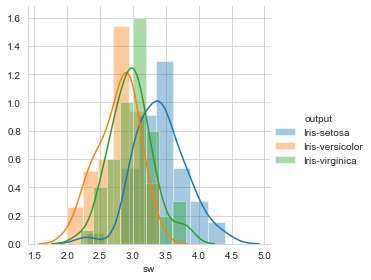

In [74]:
sns.FacetGrid(iris,hue="output",height=4).map(sns.distplot,"sw").add_legend();
plt.show();

__Let's plot CDF(Cumulative Distribution Function) and PDF (Probability Distribution Function) using petal_length__

counts: [0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
sum of counts:  11.11111111111111
binedges  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
pdf  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


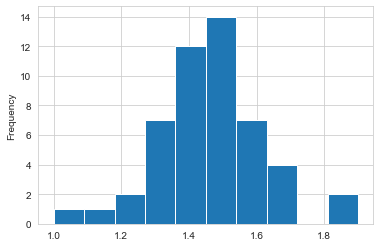

In [75]:
iris_setosa = iris.loc[iris["output"] == "Iris-setosa"];
iris_virginica = iris.loc[iris["output"] == "Iris-virginica"];
iris_versicolor = iris.loc[iris["output"] == "Iris-versicolor"];
counts, bin_edges = np.histogram(iris_setosa['pl'], bins=10, density = True)
pdf = counts/(sum(counts))
print("counts:" , counts)
print("sum of counts: ", sum(counts))
print("binedges " , bin_edges)
print("pdf " , pdf)
#histogram looks like this --
iris_setosa.pl.plot(kind='hist', bins=10)
plt.show()

__CALCULATE CDF__

In [76]:
cdf = np.cumsum(pdf)
print("cdf " , cdf)

cdf  [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


__After plotting (see below)__
<br>
25% of point typically have their petal length between 1.5 and 1.6 called PDF
<br>
There are 80% of setosa flower that have their petal length less than 1.6
<br>
There are 20% of setosa flower have their petal length is less than 1.3

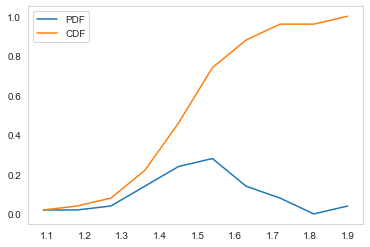

In [77]:
plt.grid()
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.legend()
plt.show()

In [78]:
iris.dtypes

sl        float64
sw        float64
pl        float64
pw        float64
output     object
dtype: object

In [79]:
iris.output=iris.output.astype('category')

In [80]:
iris.columns

Index(['sl', 'sw', 'pl', 'pw', 'output'], dtype='object')

In [81]:
x=iris[['sl', 'sw', 'pl', 'pw']]
y=iris['output']

In [82]:
df=iris

**import all required libraries**

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



**split data**

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.7)

**apply feature importance**

[0.09506947 0.04958138 0.34495415 0.510395  ]


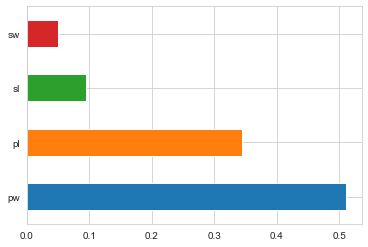

In [85]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [86]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

  Specs       Score
2    pl  116.169847
3    pw   67.244828
0    sl   10.817821
1    sw    3.594499


**apply decision tree algorithm**

In [87]:
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
print("accuracy is")
print(clf.score(xtest,ytest))
print("feature importance array :")
print(clf.feature_importances_)
yrfc= clf.predict(xtest)     #predicted values of random forest classifier
yrfc=pd.Series(yrfc)
print("confusion matrix")
print(confusion_matrix(ytest,yrfc))
print("precision_recall_fscore_support")
print(precision_recall_fscore_support(ytest,yrfc))

accuracy is
0.9428571428571428
feature importance array :
[0. 0. 0. 1.]
confusion matrix
[[30  0  0]
 [ 0 35  1]
 [ 0  5 34]]
precision_recall_fscore_support
(array([1.        , 0.875     , 0.97142857]), array([1.        , 0.97222222, 0.87179487]), array([1.        , 0.92105263, 0.91891892]), array([30, 36, 39], dtype=int64))
